In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       # analysis tool
from datetime import datetime
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd# Prepare dataset


cars_customers_data = spark.read.table("default.new_cleaned_carscustomer_data_pradeep")

df_table=cars_customers_data.toPandas()
df = pd.DataFrame(df_table)
df.head()

,TotalChildren,NumberChildrenAtHome,NumberOfPurchases,ProfitGenerated,Age,MaritalStatus_ S,YearlyIncome_ 25001-50000,YearlyIncome_ 50001-75000,YearlyIncome_ 75001-100000,YearlyIncome_ greater than 100000,Gender_ M,Education_ Graduate Degree,Education_ High School,Education_ Partial College,Education_ Partial High School,Occupation_ Management,Occupation_ Manual,Occupation_ Professional,Occupation_ Skilled Manual,HomeOwner_ True,CommuteDistance_ 1-2 Miles,CommuteDistance_ 10+ Miles,CommuteDistance_ 2-5 Miles,CommuteDistance_ 5-10 Miles
0,1.705840,2.554599,2.753732,-0.239634,-0.658761,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,-1.207835,-0.704899,-1.253591,1.456773,-0.405635,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.540370,1.250800,-0.251760,-0.365055,-0.321260,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.123105,1.902699,0.750071,0.448947,-0.321260,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.207835,-0.704899,-1.253591,1.714110,-0.321260,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
df.columns
df.columns = df.columns.str.replace(' ', '', regex=False)
df.head()

,TotalChildren,NumberChildrenAtHome,NumberOfPurchases,ProfitGenerated,Age,MaritalStatus_S,YearlyIncome_25001-50000,YearlyIncome_50001-75000,YearlyIncome_75001-100000,YearlyIncome_greaterthan100000,Gender_M,Education_GraduateDegree,Education_HighSchool,Education_PartialCollege,Education_PartialHighSchool,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_SkilledManual,HomeOwner_True,CommuteDistance_1-2Miles,CommuteDistance_10+Miles,CommuteDistance_2-5Miles,CommuteDistance_5-10Miles
0,1.705840,2.554599,2.753732,-0.239634,-0.658761,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,-1.207835,-0.704899,-1.253591,1.456773,-0.405635,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.540370,1.250800,-0.251760,-0.365055,-0.321260,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.123105,1.902699,0.750071,0.448947,-0.321260,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.207835,-0.704899,-1.253591,1.714110,-0.321260,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:

X = df[[ 'YearlyIncome_25001-50000', 'NumberOfPurchases']]

print(X)

      YearlyIncome_25001-50000  NumberOfPurchases
0                            0           2.753732
1                            0          -1.253591
2                            0          -0.251760
3                            0           0.750071
4                            0          -1.253591
...                        ...                ...
9995                         0          -1.253591
9996                         0          -0.251760
9997                         0          -1.253591
9998                         0          -1.253591
9999                         0          -1.253591

[10000 rows x 2 columns]


In [0]:
# Elbow Method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# Train the Kmeans model using the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)


/databricks/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9ede756700>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self

[6 1 4 ... 1 1 1]


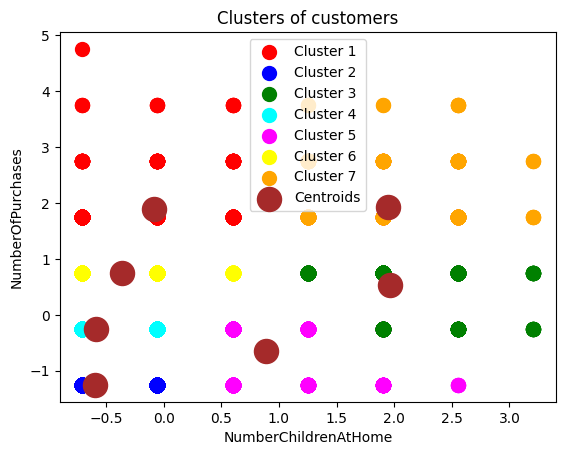

In [0]:
# Visualising the clusters
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X.values[y_kmeans == 5, 0], X.values[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(X.values[y_kmeans == 6, 0], X.values[y_kmeans == 6, 1], s = 100, c = 'orange', label = 'Cluster 7')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('NumberChildrenAtHome')
plt.ylabel('NumberOfPurchases')
plt.legend()
plt.show()
